# Evaluación Final del Módulo 3

In [486]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np


# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid") # establece el estilo del fondo de las gráficas como "whitegrid". Las gráficas tendrán un fondo blanco con líneas de cuadrícula horizontales y verticales.
sns.set_theme(style="dark") # cambiará el esquema de colores predeterminado de Seaborn a uno más oscuro, adecuado para gráficas con fondos claros. 
plt.style.use('Solarize_Light2')# establece el estilo en Solarize_Lihgt2. 

# Realizar los distintos test
# ------------------------------------------------------------------------------
from scipy import stats
from scipy.stats import ttest_ind, norm, chi2_contingency, f_oneway, fligner
from sklearn.linear_model import LinearRegression

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [487]:
df1 = pd.read_csv("Customer_Flight_Activity.csv", index_col=0)
df1.head()

,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,
100018,2017,1,3,0,3,1521,152.0,0,0
100102,2017,1,10,4,14,2030,203.0,0,0
100140,2017,1,6,0,6,1200,120.0,0,0
100214,2017,1,0,0,0,0,0.0,0,0
100272,2017,1,0,0,0,0,0.0,0,0


In [488]:
df2 = pd.read_csv("Customer_Loyalty_History.csv", index_col=0)
df2.head()

,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
Loyalty Number,,,,,,,,,,,,,,,
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [489]:
#Prefiero unir primero para no tener que explorar por separado, sabiendo el nombre de las columnas, ya me vale para saber cómo quiero hacerlo

In [490]:
#Uno por la columna común que es la primera (Loyalty Number)
df= pd.merge(df2, df1, left_index=True, right_index=True, how = 'inner')

# Fase 1: Exploración y limpieza

In [491]:
df.head()

,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,,,,,,,,,,,,,,,,
100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,2017,1,3,0,3,1521,152.0,0,0
100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,2017,2,2,2,4,1320,132.0,0,0
100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,2018,10,6,4,10,3110,311.0,385,31
100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,2017,4,4,0,4,924,92.0,0,0
100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,2017,5,0,0,0,0,0.0,0,0


In [492]:
df.sample(10)

,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,,,,,,,,,,,,,,,,
375540,Canada,British Columbia,Whistler,V6T 1Y8,Female,Doctor,125167.0,Divorced,Nova,13736.13,Standard,2012,7,NaN,NaN,2018,10,0,0,0,0,0.0,0,0
221446,Canada,Ontario,Toronto,M8Y 4K8,Female,Bachelor,63965.0,Married,Nova,9429.63,Standard,2013,9,NaN,NaN,2017,10,14,2,16,2656,265.0,0,0
194480,Canada,British Columbia,Whistler,V6T 1Y8,Male,Bachelor,48579.0,Married,Aurora,19338.53,Standard,2018,6,NaN,NaN,2018,10,1,1,2,2556,255.0,0,0
577405,Canada,British Columbia,Whistler,V6T 1Y8,Female,College,NaN,Married,Aurora,5205.91,Standard,2016,4,NaN,NaN,2017,1,6,6,12,1644,164.0,562,45
713831,Canada,Prince Edward Island,Charlottetown,C1A 6E8,Female,College,NaN,Divorced,Star,9435.54,Standard,2013,1,NaN,NaN,2017,7,11,0,11,2178,217.0,0,0
190405,Canada,Ontario,Trenton,K8V 4B2,Male,Bachelor,58119.0,Divorced,Aurora,15394.87,Standard,2013,5,2017.0,7.0,2017,7,6,0,6,2766,276.0,0,0
404314,Canada,Quebec,Hull,J8Y 3Z5,Male,High School or Below,72896.0,Divorced,Star,2491.26,Standard,2016,4,NaN,NaN,2018,10,0,0,0,0,0.0,0,0
384412,Canada,Quebec,Montreal,H2T 2J6,Male,Bachelor,70473.0,Divorced,Nova,7519.13,2018 Promotion,2018,4,2018.0,12.0,2017,6,0,0,0,0,0.0,0,0
253689,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,47512.0,Divorced,Nova,7756.17,Standard,2013,12,NaN,NaN,2018,7,0,0,0,0,0.0,0,0


In [493]:
print(f"El número de filas que tenemos es {df.shape[0]}, y el número de columnas es {df.shape[1]}")

df.shape

El número de filas que tenemos es 405624, y el número de columnas es 24


(405624, 24)

In [494]:
#Saco la lista de columnas para verlas en vertical

df.columns.tolist()

['Country',
 'Province',
 'City',
 'Postal Code',
 'Gender',
 'Education',
 'Salary',
 'Marital Status',
 'Loyalty Card',
 'CLV',
 'Enrollment Type',
 'Enrollment Year',
 'Enrollment Month',
 'Cancellation Year',
 'Cancellation Month',
 'Year',
 'Month',
 'Flights Booked',
 'Flights with Companions',
 'Total Flights',
 'Distance',
 'Points Accumulated',
 'Points Redeemed',
 'Dollar Cost Points Redeemed']

In [495]:
# Modifico título de columnas para que no haya espacios para mejor lectura
columnas = [col.replace(" ", "_") for col in df.columns]
df.columns = columnas
df.head()

,Country,Province,City,Postal_Code,Gender,Education,Salary,Marital_Status,Loyalty_Card,CLV,Enrollment_Type,Enrollment_Year,Enrollment_Month,Cancellation_Year,Cancellation_Month,Year,Month,Flights_Booked,Flights_with_Companions,Total_Flights,Distance,Points_Accumulated,Points_Redeemed,Dollar_Cost_Points_Redeemed
Loyalty Number,,,,,,,,,,,,,,,,,,,,,,,,
100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,2017,1,3,0,3,1521,152.0,0,0
100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,2017,2,2,2,4,1320,132.0,0,0
100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,2018,10,6,4,10,3110,311.0,385,31
100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,2017,4,4,0,4,924,92.0,0,0
100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,2017,5,0,0,0,0,0.0,0,0


In [496]:
#Saco las estadísticas de las columnas numéricas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,302952.0,79268.825953,34992.133508,-58486.00,59262.00,73479.00,88612.00,407228.00
CLV,405624.0,7991.976226,6863.663857,1898.01,3985.32,5776.34,8936.82,83325.38
Enrollment_Year,405624.0,2015.252529,1.979427,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment_Month,405624.0,6.668008,3.399766,1.00,4.00,7.00,10.00,12.00
Cancellation_Year,50064.0,2016.499521,1.384336,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation_Month,50064.0,6.966443,3.448300,1.00,4.00,7.00,10.00,12.00
Year,405624.0,2017.500000,0.500001,2017.00,2017.00,2017.50,2018.00,2018.00
Month,405624.0,6.500000,3.452057,1.00,3.75,6.50,9.25,12.00
Flights_Booked,405624.0,4.115052,5.225518,0.00,0.00,1.00,8.00,21.00
Flights_with_Companions,405624.0,1.031805,2.076869,0.00,0.00,0.00,1.00,11.00


In [497]:
df.describe(include=object).T

,count,unique,top,freq
Country,405624,1,Canada,405624
Province,405624,11,Ontario,130896
City,405624,29,Toronto,81096
Postal_Code,405624,55,V6E 3D9,21984
Gender,405624,2,Female,203640
Education,405624,5,Bachelor,253752
Marital_Status,405624,3,Married,235800
Loyalty_Card,405624,3,Star,184224
Enrollment_Type,405624,2,Standard,382200


In [498]:
df.isnull().sum()

Country                             0
Province                            0
City                                0
Postal_Code                         0
Gender                              0
Education                           0
Salary                         102672
Marital_Status                      0
Loyalty_Card                        0
CLV                                 0
Enrollment_Type                     0
Enrollment_Year                     0
Enrollment_Month                    0
Cancellation_Year              355560
Cancellation_Month             355560
Year                                0
Month                               0
Flights_Booked                      0
Flights_with_Companions             0
Total_Flights                       0
Distance                            0
Points_Accumulated                  0
Points_Redeemed                     0
Dollar_Cost_Points_Redeemed         0
dtype: int64

In [499]:
df.duplicated().sum()

1864

In [500]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405624 entries, 100018 to 999986
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Country                      405624 non-null  object 
 1   Province                     405624 non-null  object 
 2   City                         405624 non-null  object 
 3   Postal_Code                  405624 non-null  object 
 4   Gender                       405624 non-null  object 
 5   Education                    405624 non-null  object 
 6   Salary                       302952 non-null  float64
 7   Marital_Status               405624 non-null  object 
 8   Loyalty_Card                 405624 non-null  object 
 9   CLV                          405624 non-null  float64
 10  Enrollment_Type              405624 non-null  object 
 11  Enrollment_Year              405624 non-null  int64  
 12  Enrollment_Month             405624 non-null  int64  

In [501]:
df["Salary"].value_counts().sum()

302952

In [502]:
# Hay valores negativos, vamos a pasarlos a nulos. 
#Pero antes vamos a comprobar los nulos para ver que esos se sumen

In [503]:
df["Salary"].isnull().sum()
#102672

102672

In [504]:
#Salary tiene números negativos. Los pasamos a nulos

df["Salary"] = df["Salary"].mask(df["Salary"] < 0, None)


In [505]:
#Comprobamos que haya más nulos que antes
df["Salary"].isnull().sum()
#103152 sí hay más que antes, eso es que ha funcionado

103152

In [506]:
#Cambio los nulos por la mediana, por la media no porque se descompensa con los valores lejanos al centro
mediana_Salary = df['Salary'].median()
df['Salary'].fillna(mediana_Salary, inplace=True)

In [507]:
df["Salary"].isnull().sum()

0

In [508]:
df["Salary"].value_counts().sum()

405624

In [509]:
# Ahora el value_count nos da más valores porque los nulos ya son valores guays

Voy con la siguiente columna: **Cancellation_Year**

In [510]:
df["Cancellation_Year"].value_counts().sum()

50064

In [511]:
df["Cancellation_Year"].isnull().sum()

355560

In [512]:
#Miro la cantidad de valores de otra columna sin nulos para ver cuánto sería el total 
df["Enrollment_Month"].value_counts().sum()

405624

In [513]:
# Convierto los nulos a 0 para eliminar los nulos. Es decir:

# LEYENDA: 0 significa que no se ha dado de baja 
df["Cancellation_Year"].fillna(0, inplace=True)


In [514]:
df["Cancellation_Year"].isnull().sum()

0

In [515]:
df["Cancellation_Year"].value_counts().sum()

405624

Seguimos con Cancellation_Month

In [516]:
df["Cancellation_Month"].value_counts().sum()

50064

In [517]:
df["Cancellation_Month"].isnull().sum()

355560

In [518]:
df["Cancellation_Month"].fillna(0, inplace=True)


In [519]:
df["Cancellation_Month"].value_counts().sum()

405624

In [520]:
df["Cancellation_Month"].isnull().sum()

0

In [521]:
# Comprobamos que no haya nulos
df.isnull().sum()

Country                        0
Province                       0
City                           0
Postal_Code                    0
Gender                         0
Education                      0
Salary                         0
Marital_Status                 0
Loyalty_Card                   0
CLV                            0
Enrollment_Type                0
Enrollment_Year                0
Enrollment_Month               0
Cancellation_Year              0
Cancellation_Month             0
Year                           0
Month                          0
Flights_Booked                 0
Flights_with_Companions        0
Total_Flights                  0
Distance                       0
Points_Accumulated             0
Points_Redeemed                0
Dollar_Cost_Points_Redeemed    0
dtype: int64

Ya no tenemos nulos. Vamos a por los duplicados

In [522]:
df.duplicated().sum()

1864

In [523]:
columnas_con_duplicados = df[df.duplicated(keep=False)].columns.tolist()
columnas_con_duplicados

['Country',
 'Province',
 'City',
 'Postal_Code',
 'Gender',
 'Education',
 'Salary',
 'Marital_Status',
 'Loyalty_Card',
 'CLV',
 'Enrollment_Type',
 'Enrollment_Year',
 'Enrollment_Month',
 'Cancellation_Year',
 'Cancellation_Month',
 'Year',
 'Month',
 'Flights_Booked',
 'Flights_with_Companions',
 'Total_Flights',
 'Distance',
 'Points_Accumulated',
 'Points_Redeemed',
 'Dollar_Cost_Points_Redeemed']

In [524]:
# No hay duplicados en Loyalty Number así que todo bien

Vamos con los tipos de dato

In [525]:
df.dtypes

Country                         object
Province                        object
City                            object
Postal_Code                     object
Gender                          object
Education                       object
Salary                         float64
Marital_Status                  object
Loyalty_Card                    object
CLV                            float64
Enrollment_Type                 object
Enrollment_Year                  int64
Enrollment_Month                 int64
Cancellation_Year              float64
Cancellation_Month             float64
Year                             int64
Month                            int64
Flights_Booked                   int64
Flights_with_Companions          int64
Total_Flights                    int64
Distance                         int64
Points_Accumulated             float64
Points_Redeemed                  int64
Dollar_Cost_Points_Redeemed      int64
dtype: object

In [526]:
df.sample(15)

,Country,Province,City,Postal_Code,Gender,Education,Salary,Marital_Status,Loyalty_Card,CLV,Enrollment_Type,Enrollment_Year,Enrollment_Month,Cancellation_Year,Cancellation_Month,Year,Month,Flights_Booked,Flights_with_Companions,Total_Flights,Distance,Points_Accumulated,Points_Redeemed,Dollar_Cost_Points_Redeemed
Loyalty Number,,,,,,,,,,,,,,,,,,,,,,,,
777171,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,Bachelor,76838.0,Married,Star,2506.02,Standard,2014,5,0.0,0.0,2018,8,2,0,2,1834,183.00,0,0
871287,Canada,Ontario,Toronto,P1W 1K4,Male,Bachelor,80661.0,Married,Nova,6832.37,Standard,2013,8,0.0,0.0,2017,8,17,0,17,2992,299.00,0,0
990077,Canada,Ontario,Trenton,K8V 4B2,Male,Bachelor,75158.0,Married,Nova,8629.33,Standard,2016,1,0.0,0.0,2017,2,7,0,7,2065,206.00,0,0
769023,Canada,British Columbia,West Vancouver,V6V 8Z3,Male,College,73523.0,Single,Star,2113.86,Standard,2014,7,2018.0,3.0,2018,5,0,0,0,0,0.00,0,0
595024,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,58844.0,Married,Nova,7356.01,Standard,2012,8,0.0,0.0,2018,6,0,0,0,0,0.00,0,0
604274,Canada,Ontario,Toronto,M8Y 4K8,Male,College,73523.0,Single,Star,6062.44,Standard,2015,2,0.0,0.0,2017,11,0,0,0,0,0.00,0,0
992065,Canada,Alberta,Banff,T4V 1D4,Female,Bachelor,83007.0,Married,Nova,4731.75,Standard,2017,10,2018.0,6.0,2018,9,0,0,0,0,0.00,0,0
786709,Canada,New Brunswick,Fredericton,E3B 2H2,Male,College,73523.0,Married,Star,2443.93,Standard,2016,8,0.0,0.0,2017,10,11,6,17,1819,181.00,0,0
672570,Canada,British Columbia,Vancouver,V6E 3D9,Male,Bachelor,58894.0,Married,Nova,8267.12,Standard,2015,10,0.0,0.0,2017,2,0,0,0,0,0.00,0,0


In [527]:
# Vemos que Cancellation_Year y Cancellation_Month son float sin necesidad de decimales, los demás están bien

In [528]:
# Pasamos a int 
df["Cancellation_Year"] = df["Cancellation_Year"].astype(int)
df["Cancellation_Month"] = df["Cancellation_Month"].astype(int)


In [529]:
df.dtypes

Country                         object
Province                        object
City                            object
Postal_Code                     object
Gender                          object
Education                       object
Salary                         float64
Marital_Status                  object
Loyalty_Card                    object
CLV                            float64
Enrollment_Type                 object
Enrollment_Year                  int64
Enrollment_Month                 int64
Cancellation_Year                int64
Cancellation_Month               int64
Year                             int64
Month                            int64
Flights_Booked                   int64
Flights_with_Companions          int64
Total_Flights                    int64
Distance                         int64
Points_Accumulated             float64
Points_Redeemed                  int64
Dollar_Cost_Points_Redeemed      int64
dtype: object

# Fase 2: Visualización

1. Distribución de vuelos reservados mes durante el año

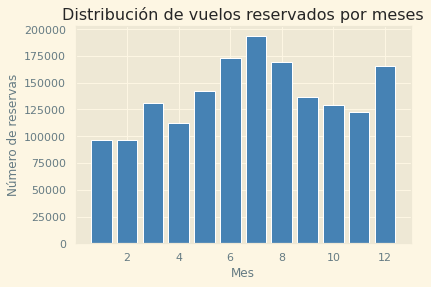

In [530]:
# Obtener el mes de cada reserva
mes_reserva = df['Month']

# Agrupar por mes y sumar el número de reservas
reservas_por_mes = df.groupby(mes_reserva)['Flights_Booked'].sum()

# Mostrar la gráfica
plt.bar(reservas_por_mes.index, reservas_por_mes.values, color='steelblue')
plt.xlabel('Mes')
plt.ylabel('Número de reservas')
plt.title('Distribución de vuelos reservados por meses')
plt.show()

In [531]:
# Conclusión: en verano y en navidad la gente viaja más

2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

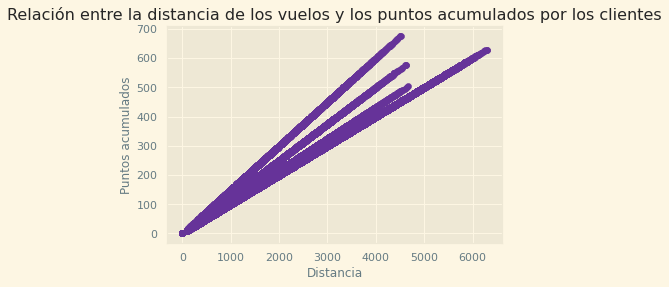

In [554]:
#Hacemos una gráfica de dispersión 
plt.scatter(df["Distance"], df["Points_Accumulated"],linewidth=0.55, color="rebeccapurple")

# Título del gráfico y de cada eje
plt.title("Relación entre la distancia de los vuelos y los puntos acumulados por los clientes")
plt.xlabel("Distancia")
plt.ylabel("Puntos acumulados")

plt.show()

In [533]:
# Podemos ver cómo a más distancia, más puntos se acumulan
# No consigo cambiar el grosor de la linea

3. ¿Cuál es la distribución de los clientes por provincia o estado?

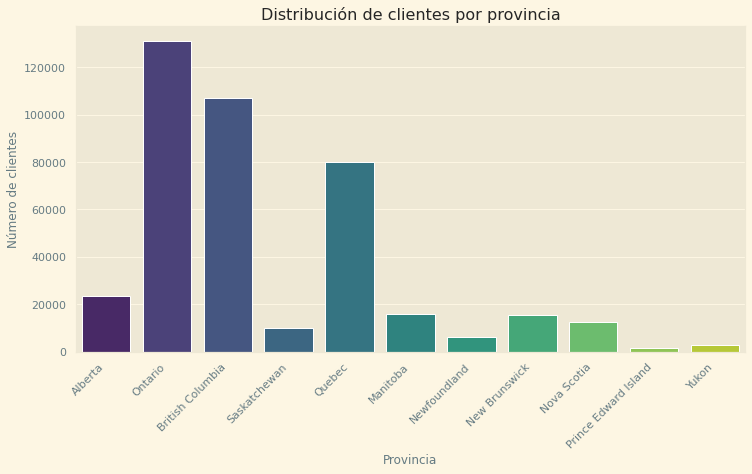

In [534]:
# Grafica para mostrar la frecuencia de observaciones 
plt.figure(figsize=(12, 6))
sns.countplot(x='Province', data=df, palette='viridis')
plt.xticks(rotation=45, ha='right')  # Rotar porque de lado se entiende mal
#Títulos
plt.title('Distribución de clientes por provincia')
plt.xlabel('Provincia')
plt.ylabel('Número de clientes')
plt.show()


4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

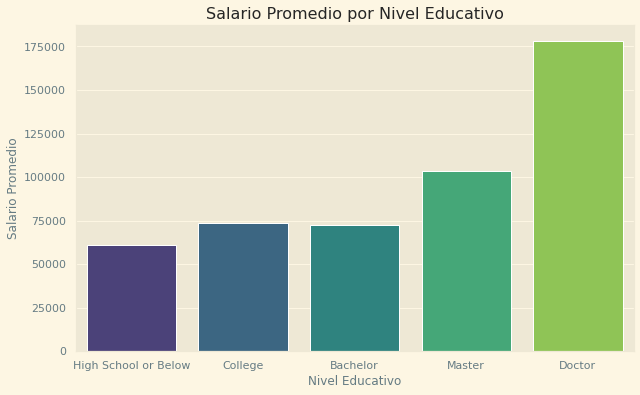

In [535]:
# Definir el orden de menos a más de las values de Education
orden_educacion = ['High School or Below', 'College', 'Bachelor', 'Master', 'Doctor']

# Media del salario agrupado por nivel educativo
average_salary_by_education = df.groupby('Education')['Salary'].mean().reindex(orden_educacion).reset_index()

# Crear un gráfico de barras para comparar el salario promedio por nivel educativo
plt.figure(figsize=(10, 6))
sns.barplot(x='Education', y='Salary', data=average_salary_by_education, order=orden_educacion, palette='viridis')
plt.title('Salario Promedio por Nivel Educativo')
plt.xlabel('Nivel Educativo')
plt.ylabel('Salario Promedio')
plt.show()


In [536]:
# CONCLUSIÓN:  A mayor nivel educativo, un mayor salario, aunque entre Collegue y Bachelor desciende un poco

5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

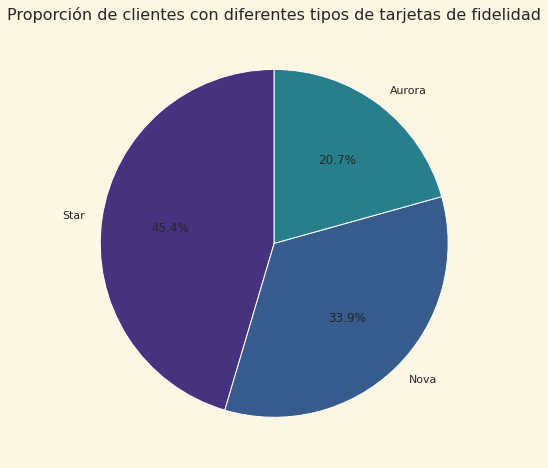

In [537]:

# Cuántas tarjetas de cada tipo hay
loyalty_card_counts = df['Loyalty_Card'].value_counts(normalize=True)

# Gráfica de quesito para ver la  proporción
plt.figure(figsize=(8, 8))
loyalty_card_counts.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('viridis'), startangle=90)
plt.title('Proporción de clientes con diferentes tipos de tarjetas de fidelidad')
plt.ylabel('')  # Eliminamos Y que sale torcida
plt.show()


6. ¿Cómo se distribuyen los clientes según su estado civil y género?

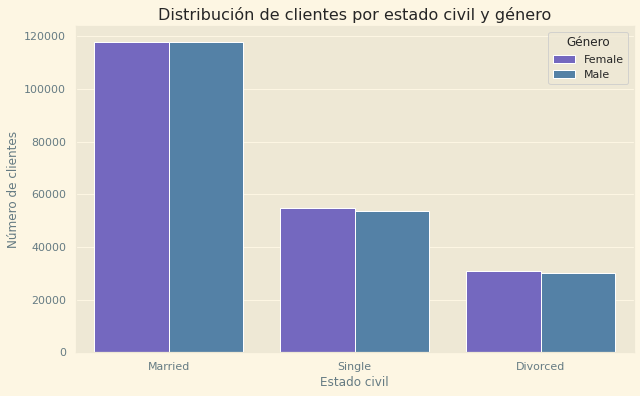

In [538]:

# Ponemos colores a cada género
gender_colors = {'Male': 'steelblue', 'Female': 'slateblue'}

# Gráfica de barras apiladas para la distribución de clientes según el estado civil y el género
plt.figure(figsize=(10, 6))
sns.countplot(x='Marital_Status', hue='Gender', data=df, palette=gender_colors)
plt.title('Distribución de clientes por estado civil y género')
plt.xlabel('Estado civil')
plt.ylabel('Número de clientes')
plt.legend(title='Género')
plt.show()


In [539]:
# Podemos ver que hay muchos más casados que solteros o divorciados, de hecho, la suma de estos dos no alcanza a los casados

# Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

In [540]:
# Voy a examinar las columnas 'Flights_Booked' y 'Education'.

In [541]:
df["Education"].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [542]:
df["Flights_Booked"].unique()

array([ 3,  2,  6,  4,  0, 10,  9, 13,  1, 14,  7,  5, 11, 17,  8, 15, 12,
       16, 20, 18, 19, 21])

1. Preparación de Datos:
Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.

In [543]:
# Creo un df nuevo, ponemos 3 por orden y porque es fase 3
df3 = df[['Flights_Booked', 'Education']]
df3

,Flights_Booked,Education
Loyalty Number,,
100018,3,Bachelor
100018,2,Bachelor
100018,6,Bachelor
100018,4,Bachelor
100018,0,Bachelor
...,...,...
999986,15,Bachelor
999986,0,Bachelor
999986,6,Bachelor


In [571]:
# Creamos una funcion que nos divida la educacion en dos grupos de nivel
def asignar_nivel(valor):
    if valor in ['High School or Below', 'College', 'Bachelor']:
        return 'Graduated or Below'
    else:
        return 'Postgraduated'

df3['Education_Category'] = df3['Education'].apply(asignar_nivel)

In [585]:
df3.sample(15) 

,Flights_Booked,Education,Education_Category
Loyalty Number,,,
253210,0,Bachelor,Graduated or Below
628452,0,Bachelor,Graduated or Below
997439,3,Master,Postgraduated
263822,0,Bachelor,Graduated or Below
715015,7,Bachelor,Graduated or Below
861336,0,College,Graduated or Below
526975,0,Bachelor,Graduated or Below
567261,9,Bachelor,Graduated or Below
504638,9,College,Graduated or Below


2. Análisis Descriptivo:
Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estandar, los percentiles) del número de vuelos reservados para cada grupo.

In [545]:
# Pedimos el número de vuelos según la columna de dos grupos
estadisticas_vuelos_educacion = df3.groupby('Education_Category')['Flights_Booked'].describe()
estadisticas_vuelos_educacion

,count,mean,std,min,25%,50%,75%,max
Education_Category,,,,,,,,
Graduate or below,375432.0,4.111301,5.224839,0.0,0.0,1.0,8.0,21.0
Postgraduate,30192.0,4.161698,5.233815,0.0,0.0,1.0,8.0,21.0


In [546]:
df3["Flights_Booked"].describe()

count    405624.000000
mean          4.115052
std           5.225518
min           0.000000
25%           0.000000
50%           1.000000
75%           8.000000
max          21.000000
Name: Flights_Booked, dtype: float64

3. Prueba Estadística:
Realiza una prueba de A/B testing para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

In [547]:
# Definimos las hispótesis

#H0: Hipótesis nula: No existe diferencia significativa en el número de vuelos reservados entre el grupo de menor nivel educativo y el de mayor nivel educativo. 

#H1: Hipótesis alternativa: Sí existe diferencia significativa en el número de vuelos reservados entre el grupo de menor nivel educativo y el de mayor nivel educativo.

In [548]:
# Vuelos por nivel educativo
graduate_vuelos = df3[df3['Education_Category'] == 'Graduate or below']['Flights_Booked']
postgraduate_vuelos = df3[df3['Education_Category'] == 'Postgraduate']['Flights_Booked']

# Realizar una prueba t independiente
t_statistic, p_value = stats.ttest_ind(graduate_vuelos, postgraduate_vuelos, equal_var=False)

# Vemos los números del resultado de la prueba
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Averiguar si P-value es menor que alpha
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")

T-statistic: -1.6098836406577404
P-value: 0.10743222651379422
No hay suficiente evidencia para rechazar la hipótesis nula.


<Normalidad>

**Normalidad**

In [561]:
# lo primero que hacemos es crear una función para testar la normalidad de los datos
def normalidad(dataframe, columna):
    
    statistic, p_value = stats.shapiro(dataframe[columna])
    if p_value > 0.05:
        print(f"Para la columna {columna} los datos siguen una distribución normal.")
    else:
        print(f"Para la columna {columna} los datos no siguen una distribución normal.")


In [566]:
norm = normalidad(df3, 'Flights_Booked')

Para la columna Flights_Booked los datos no siguen una distribución normal.


**Homogeneidad**

In [568]:
def homogeneidad (dataframe, columna, columna_metrica):
    
    """
    Evalúa la homogeneidad de las varianzas entre grupos para una métrica específica en un DataFrame dado.

    Parámetros:
    - dataframe (DataFrame): El DataFrame que contiene los datos.
    - columna (str): El nombre de la columna que se utilizará para dividir los datos en grupos.
    - columna_metrica (str): El nombre de la columna que se utilizará para evaluar la homogeneidad de las varianzas.

    Returns:
    No devuelve nada directamente, pero imprime en la consola si las varianzas son homogéneas o no entre los grupos.
    Se utiliza la prueba de Levene para evaluar la homogeneidad de las varianzas. Si el valor p resultante es mayor que 0.05,
    se concluye que las varianzas son homogéneas; de lo contrario, se concluye que las varianzas no son homogéneas.
    """
    
    # lo primero que tenemos que hacer es crear tantos conjuntos de datos para cada una de las categorías que tenemos, Control Campaign y Test Campaign
    valores_evaluar = []
    
    for valor in dataframe[columna].unique():
        valores_evaluar.append(dataframe[dataframe[columna]== valor][columna_metrica])

    statistic, p_value = stats.levene(*valores_evaluar)
    if p_value > 0.05:
        print(f"Para la métrica {columna_metrica} las varianzas son homogéneas entre grupos.")
    else:
        print(f"Para la métrica {columna_metrica}, las varianzas no son homogéneas entre grupos.")


In [569]:
hom = homogeneidad(df3, 'Education_Category','Flights_Booked')

Para la métrica Flights_Booked las varianzas son homogéneas entre grupos.


In [ ]:
# Por lo tanto no hay diferencia significativa, por lo que se cumple la Hipótesis 0 o hipótesis nula. 

# Clase (NO)

In [563]:
# Clase para realizar todas las pruebas a la vez

# Crear la clase Data_Analysis
class ABTest:
    def normalidad(df, columna, grupo):
        statistic, p_value = stats.shapiro(df[columna])
        if p_value > 0.05:
            print(f"Para el grupo '{grupo}', los datos en la columna '{columna}' siguen una distribución normal.")
            print(f'{grupo}')
        else:
            print(f"Para el grupo '{grupo}', los datos en la columna '{columna}' no siguen una distribución normal.")
            print(f'{grupo}')
   
    def homogeneidad_fligner (df, columna, nombre_columna_grupo, control_group, test_group):
        # Filtrar el DataFrame para obtener los grupos específicos
        df_control_group = df[df[nombre_columna_grupo] == control_group]
        df_test_group = df[df[nombre_columna_grupo] == test_group]

        # Ejecutar la prueba de Fligner-Killeen
        statistic, p_value = fligner(df_control_group[columna], df_test_group[columna])

        # Mostrar los resultados
        if p_value > 0.05:
            print("Las varianzas son homogéneas entre los grupos.")
        else:
            print("Las varianzas no son homogéneas entre los grupos.")
        print(f"Estadístico de la prueba: {statistic}, p-valor: {p_value}")

    def visualizar_matriz_correlacion(df, nombre_columna_grupo):
        # Filtrar el DataFrame para cada grupo
        control_group = df[df[nombre_columna_grupo] == 'ad']
        test_group = df[df[nombre_columna_grupo] == 'psa']

        # Calcular la matriz de correlación para cada grupo
        correlacion_matrix_grupo1 = control_group.corr(numeric_only=True)
        correlacion_matrix_grupo2 = test_group.corr(numeric_only=True)

        # Crear el heatmap para cada grupo
        sns.heatmap(correlacion_matrix_grupo1, annot=True, cmap="cubehelix", fmt=".2f")
        plt.title(f"Matriz de Correlación para grupo ad")
        plt.show()

        sns.heatmap(correlacion_matrix_grupo2, annot=True, cmap="cubehelix", fmt=".2f")
        plt.title(f"Matriz de Correlación para grupo psa")
        plt.show()

    def prueba_chi_cuadrado(df, columna1, columna2):
        contingency_table = pd.crosstab(df[columna1], df[columna2])
        chi2, p_chi2, _, _ = chi2_contingency(contingency_table)
        print(f"Prueba de Chi-cuadrado - p-valor: {p_chi2}")
    
    
    def prueba_t(dataframe, nombre_columna_grupo, columna_prueba):
        # Filtrar el dataframe para obtener el grupo de control y el grupo de prueba
        control_group = df[df[nombre_columna_grupo] == 'ad'][columna_prueba]
        test_group = df[df[nombre_columna_grupo] == 'psa'][columna_prueba]
        
        # Realizar la prueba t de independencia
        t_stat, p_ttest = ttest_ind(control_group, test_group, equal_var=False)  # Se asume varianzas no iguales
        
        # Imprimir el resultado
        print(f"Prueba t para la tasa de conversión entre el anuncio original y el nuevo arroja un p-valor: {p_ttest}")


In [588]:
# Aplicamos las funciones de la clase a nuestros datos

# Filtrar por grupos 'ad' y 'psa'
df_grad = df3[df3['Education_Category'] == 'Graduated or below']
df_post = df3[df3['Education_Category'] == 'Postgraduated']

# Instanciar la clase Data_Analysis
analisis = ABTest()

# Ejecutar cada función de la clase Data_Analysis con los datos filtrados
analisis.normalidad(df3, 'Flights_Booked', 'Postgraduated')


analisis.homogeneidad_fligner(df3, 'Flights_Booked', 'Education_Category', 'Graduated or below', 'Postgraduated')

analisis.visualizar_matriz_correlacion(df3, 'Education_Category')

analisis.prueba_chi_cuadrado(df3, 'Education_Category', 'Flights_Booked')

# Llamar a la función con los parámetros adecuados
analisis.prueba_t(df3, 'Education_Category', 'Flights_Booked')

TypeError: normalidad() takes 3 positional arguments but 4 were given